# **零基础入门数据挖掘-二手车交易价格预测**
## Task1 赛题理解
### 1.1、问题重述
   **1.1.1、  赛题地址:[https://tianchi.aliyun.com/competition/entrance/231784/introductionspm=5176.12281957.1004.1.38b02448ausjSX](https://tianchi.aliyun.com/competition/entrance/231784/introductionspm=5176.12281957.1004.1.38b02448ausjSX)**

   **1.1.2、  赛题理解**  
   &emsp;目标：预测二手汽车的交易价格  
   &emsp;分析：本赛题是典型的回归问题，根据数据集中提供的特征利用机器学习算法等实现价格预测。数据集中的特征过多，结合现实情况猜测几个影响价格比较大的特征，品牌、所跑公里数、燃油类型等。先粗略查看数据集,密密麻麻，不知所云，那下一步就开始进行数据的读入分析吧!



## Task2 数据分析
   

![avatar](数据分析.png)

In [1]:
#导入第三方包
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


### 2.1、读取数据

In [2]:
Train_data=pd.read_csv('used_car_train_20200313.csv',sep=' ')
Test_data=pd.read_csv('used_car_testA_20200313.csv',sep=' ')

### 2.2、观察数据
&emsp;查看训练数据集及测试数据集前五行及后五行，对数据集中的变量，数据量进行大体了解。


In [3]:
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
Train_data.shape

(150000, 31)

In [5]:
Test_data.shape

(50000, 30)

### 2.3、概述数据
&emsp;结合上面的数据，更好的梳理赛题数据，该数据来自某交易平台的二手车交易记录,总数量超过40w，包含31列变量信息，其中15列为匿名变量。从中抽取15万条作为训练集，5万条作为测试集A，5万条作为测试集B，同时对name、model、brand和regionCode等信息进行脱敏。
***************************************************************************
label|description|
:---|:--|
SaleID|销售样本ID|
name|汽车编码|
regDate|汽车注册时间|
model|车型编码|
brand|品牌|
bodyType|车身类型|
fuelType|燃油类型|
gearbox|变速箱|
power|汽车功率|
kilometer|汽车行驶公里|
notRepairedDamage|汽车有尚未修复的损坏|
regionCode|看车地区编码|
seller|销售方|
offerType|报价类型|
creatDate|广告发布时间|
v_|匿名特征，包含v0-14在内15个匿名特征|
price(目标)|汽车价格|

### 2.4、数据的描述性统计
**[描述性统计是什么?](https://www.cnblogs.com/jasonfreak/p/5441512.html)**   
&emsp;描述性统计是借助图表或者总结性的数值来描述数据的统计手段。数据挖掘工作的数据分析阶段，
[我们可借助描述性统计来描绘或总结数据的基本情况](https://zh.wikipedia.org/wiki/%E6%8F%8F%E8%BF%B0%E7%BB%9F%E8%AE%A1%E5%AD%A6)，一来可以梳理自己的思维，二来可以更好地向他人展示数据分析结果。数值分析的过程中，我们往往要计算出数据的统计特征，用来做科学计算的NumPy和SciPy工具可以满足我们的需求。Matpotlob工具可用来绘制图，满足图分析的需求。

In [6]:
Train_data.describe()#默认只输出数值型数据
#Train_data.describe().T  #可转置观察

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [7]:
Train_data.describe(include=['object'])# 对于离散型数据可以进行描述统计

,notRepairedDamage
count,150000
unique,3
top,0.0
freq,111361


&emsp;上述代码展示了训练数据集各列的计数、均值、最大最小值、标准差和第一、二、三个四分位值。

In [8]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


&emsp;上述代码展示了测试数据集各列的计数、均值、最大最小值、标准差和第一、二、三个四分位值。

In [9]:
Test_data.describe(include=['object'])# 对于离散型数据可以进行描述统计

,notRepairedDamage
count,50000
unique,3
top,0.0
freq,37249


**[describe参数详解](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)**  
&emsp;关于参数include，我在使用时没深入考虑关于数值型数据和离散型数据两类数据的问题，只是使用默认参数对数值型数据进行了描述性统计,后来看到还有关于离散型数据的描述统计，注意到了include这个参数,加入include这个参数就可以对不同数据类型进行描述统计。大家也要考虑全面数据分类问题呀！

In [10]:
#通过info()来熟悉数据类型
#Train_data.info()

In [11]:
#Test_data.info()

### 2.5、缺失值处理
 **2.5.1、  识别有缺失值的样本或特征:**

In [12]:
#Train_data.isnull().sum()

In [13]:
#Test_data.isnull().sum()

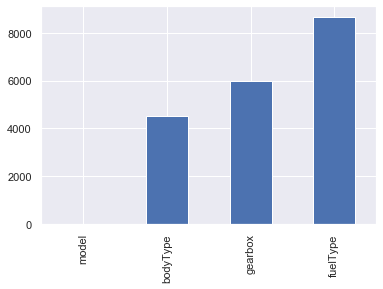

In [14]:
#缺失值可视化
sns.set(color_codes=True)
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


 **2.5.2、 [missingno库](https://www.cnblogs.com/yongestcat/p/11458057.html)**  
&emsp;数据分析之前首先要保证数据集的质量，missingno库提供了一个灵活易用的可视化工具来观察数据缺失情况，是基于matplotlib的，接受pandas数据源，下面介绍几种不同方式可视化展示数据集数据缺失情况的函数  

&emsp;**Matrix：使用最多，能快速直观地看到数据集的完整性情况，矩阵显示**  
&emsp;**Bar Chart：可以简单的展示无效数据的条形图**  
&emsp;**Heatmap：方便观察两个变量间的相关性，但是当数据集变大，这种结论的解释性会变差**  
&emsp;**endrogram：树状图采用由scipy提供的层次聚类算法通过它们之间的无效相关性（根据二进制距离测量）将变量彼此相加。在树的每个步骤中，基于哪个组合最小化剩余簇的距离来分割变量。变量集越单调，它们的总距离越接近0，并且它们的平均距离越接近零。**

&emsp;注：如果在安装missingno库的过程中出现“PackagesNotFoundError: The following packages are not available from current channels”错误，[参考网址](https://www.cnblogs.com/RB26DETT/p/11620693.html)，这个网址解救了我

**2.5.3、[缺省值  VS  null](https://blog.csdn.net/number1killer/article/details/80389696)**  
&emsp;缺省值是default-value；而null值是空值，是缺省值的一种，常见的缺省值还有0和False

In [15]:
#可视化看缺省值
#msno.matrix(Train_data.sample(250))

In [16]:
#msno.heatmap(Train_data)

In [17]:
#msno.bar(Train_data.sample(1000))

In [18]:
#查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

可以发现除了notRepairedDamage 为object类型其他都为数字 将他的几个不同的值都进行显示,想起了前面的describe（）函数

In [19]:
#对notRepairedDamage的不同值进行显示
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan

In [20]:
#先把空缺值替换成nan
Train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [21]:
#再次对处理后的notRepairedDamage的不同值进行显示
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [22]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [23]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [24]:
Test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

**2.5.4、  缺失值处理方法:**  
（1）删除法（缺失比例较小时使用）  
（2）替换法 （用某个常数替换）
&emsp;&缺失值为离散值----考虑用众数替换  
&emsp;&缺失值为数值型----考虑用均值或中位数替换  
（3）插补法（用模型进行插补）


In [25]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [19]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

**"seller","offerType"**两个类别严重倾斜，不会对预测有什么帮助，选择删除。

In [20]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

### 2.6、分析目标变量

In [21]:
#了解数据的分布特征
Train_data['price']


0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [22]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

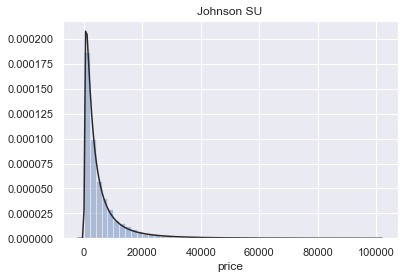

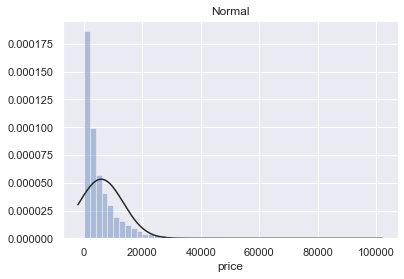

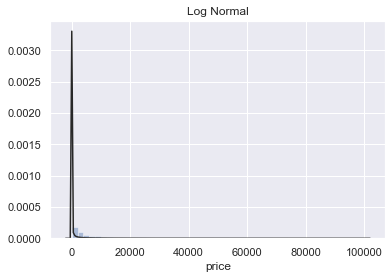

In [30]:
#总体分布概况（无界约翰分布等）
import scipy.stats as st
y=Train_data['price']
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);plt.title('Log Normal')
sns.distplot(y,kde=False,fit=st.lognorm)

**2.6.1、无界约翰逊分布:**   
&emsp;&emsp;&emsp;**SKEW函数**  :返回分布的不对称度。不对称度反映以平均值为中心的分布的不对称程度。正不对称度表示不对称部分的分布更趋向正值。负不对称度表示不对称部分的分布更趋向负值。  
&emsp;&emsp;&emsp;**KURT函数**  :返回一组数据的峰度系数（Kurtosis）。峰度系数反映与正态分布相比某一分布的相对尖锐度或平坦度。正峰度系数表示相对尖锐的分布。负峰度系数表示相对平坦的分布。

Skewness:3.346487
Kurtosis:18.995183


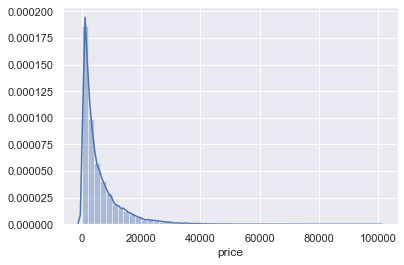

In [31]:
#最佳拟合是无界约翰逊分布
#skew:返回分布的不对称值；kurt:返回一组数据的峰度系数
sns.distplot(Train_data['price'])
print("Skewness:%f" % Train_data['price'].skew())
print("Kurtosis:%f"%Train_data['price'].kurt())

In [60]:
Train_data.skew(),Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

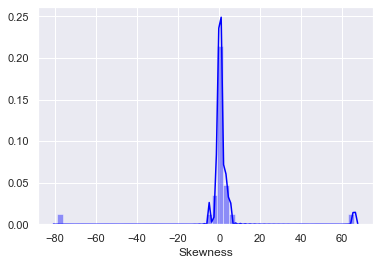

In [25]:
sns.distplot(Train_data.skew(),color='blue',axlabel='Skewness')

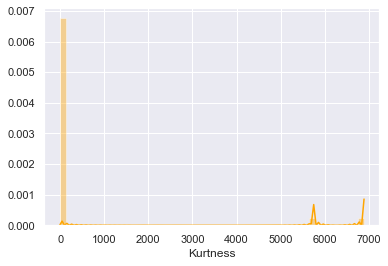

In [26]:
sns.distplot(Train_data.kurt(),color='orange',axlabel='Kurtness')

<function matplotlib.pyplot.show(*args, **kw)>

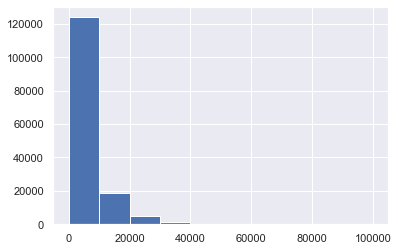

In [95]:
#查看预测值的具体频数
plt.hist(Train_data['price'],orientation='vertical',histtype='bar')
plt.show

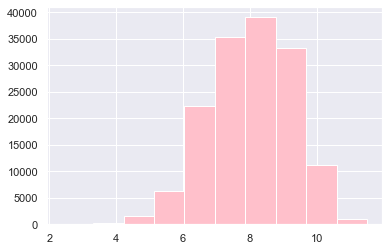

In [70]:
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='pink') 
plt.show()
#log变换z之后的分布较均匀，进行log变换进行预测，预测问题常用的trick

In [96]:
Y_train=Train_data['price']

### 2.7、分析变量

In [23]:
#数字特征
numeric_features = Train_data.select_dtypes(include=[np.number])
print("数字特征:{}".format(numeric_features.columns))
# # 类型特征
categorical_features = Train_data.select_dtypes(include=[np.object])
print("类型特征:{}".format(categorical_features.columns))

数字特征:Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'creatDate', 'price',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')
类型特征:Index(['notRepairedDamage'], dtype='object')


上述方法不适用，需人为设定!

**2.7.1、特征nunique分布:** 

In [24]:
numeric_features=['power','kilometer','v_0','v_1','v_2','v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features=['name','model','brand','bodyType','fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

In [34]:
#特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea+"的特征分布如下：")
    print("{}特征有{}个不同的值".format(cat_fea,Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有248个不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有40个不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [35]:
for cat_fea in categorical_features:
    print(cat_fea+"的分布特征如下：")
    print("{}特征有{}个不同的值".format(cat_fea,Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的分布特征如下：
name特征有37453个不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的分布特征如下：
model特征有247个不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的分布特征如下：
brand特征有40个不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的分布特征如下：
bodyType特征有8个不同的值
0.

**2.7.2、数字特征分析:** 

In [36]:
#数字特征分析
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [37]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


**2.7.3、相关性分析:** 

In [ ]:
#相关性分析
price_numeric=Train_data[numeric_features]
correlation=price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

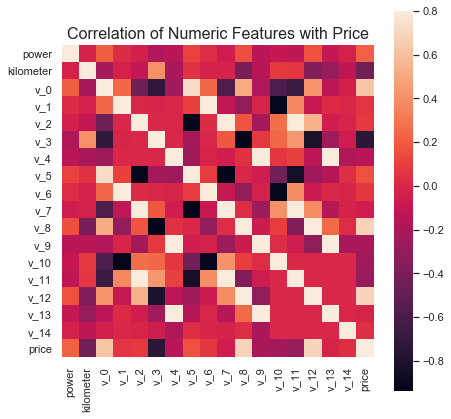

In [102]:
f,ax=plt.subplots(figsize=(7,7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [103]:
del price_numeric['price']

In [ ]:
#查看几个特征的偏度，峰值
for col in numeric_features:
    print('{:15}'.format(col),
         'Skewness:{:05.2f}'.format(Train_data[col].skew()),
         '  ',
         'Kurtosis:{:06.2f}'.format(Train_data[col].kurt())
         )

**2.7.4、[melt的使用:](https://blog.csdn.net/maymay_/article/details/80039677)**   
**参数：  pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)**  

&emsp;&emsp;&emsp;frame:要处理的数据集。  

&emsp;&emsp;&emsp;id_vars:不需要被转换的列名。

&emsp;&emsp;&emsp;value_vars:需要转换的列名，如果剩下的列全部都要转换，就不用写了。

&emsp;&emsp;&emsp;var_name和value_name是自定义设置对应的列名。

&emsp;&emsp;&emsp;col_level :如果列是MultiIndex，则使用此级别。

In [20]:
#每个数字特征分布可视化
f=pd.melt(Train_data,value_vars=numeric_features)
f

,variable,value
0,power,60.0
1,power,0.0
2,power,163.0
3,power,193.0
4,power,68.0
...,...,...
2699995,price,5900.0
2699996,price,9500.0
2699997,price,7500.0
2699998,price,4999.0


In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
g=g.map(sns.distplot,"value")

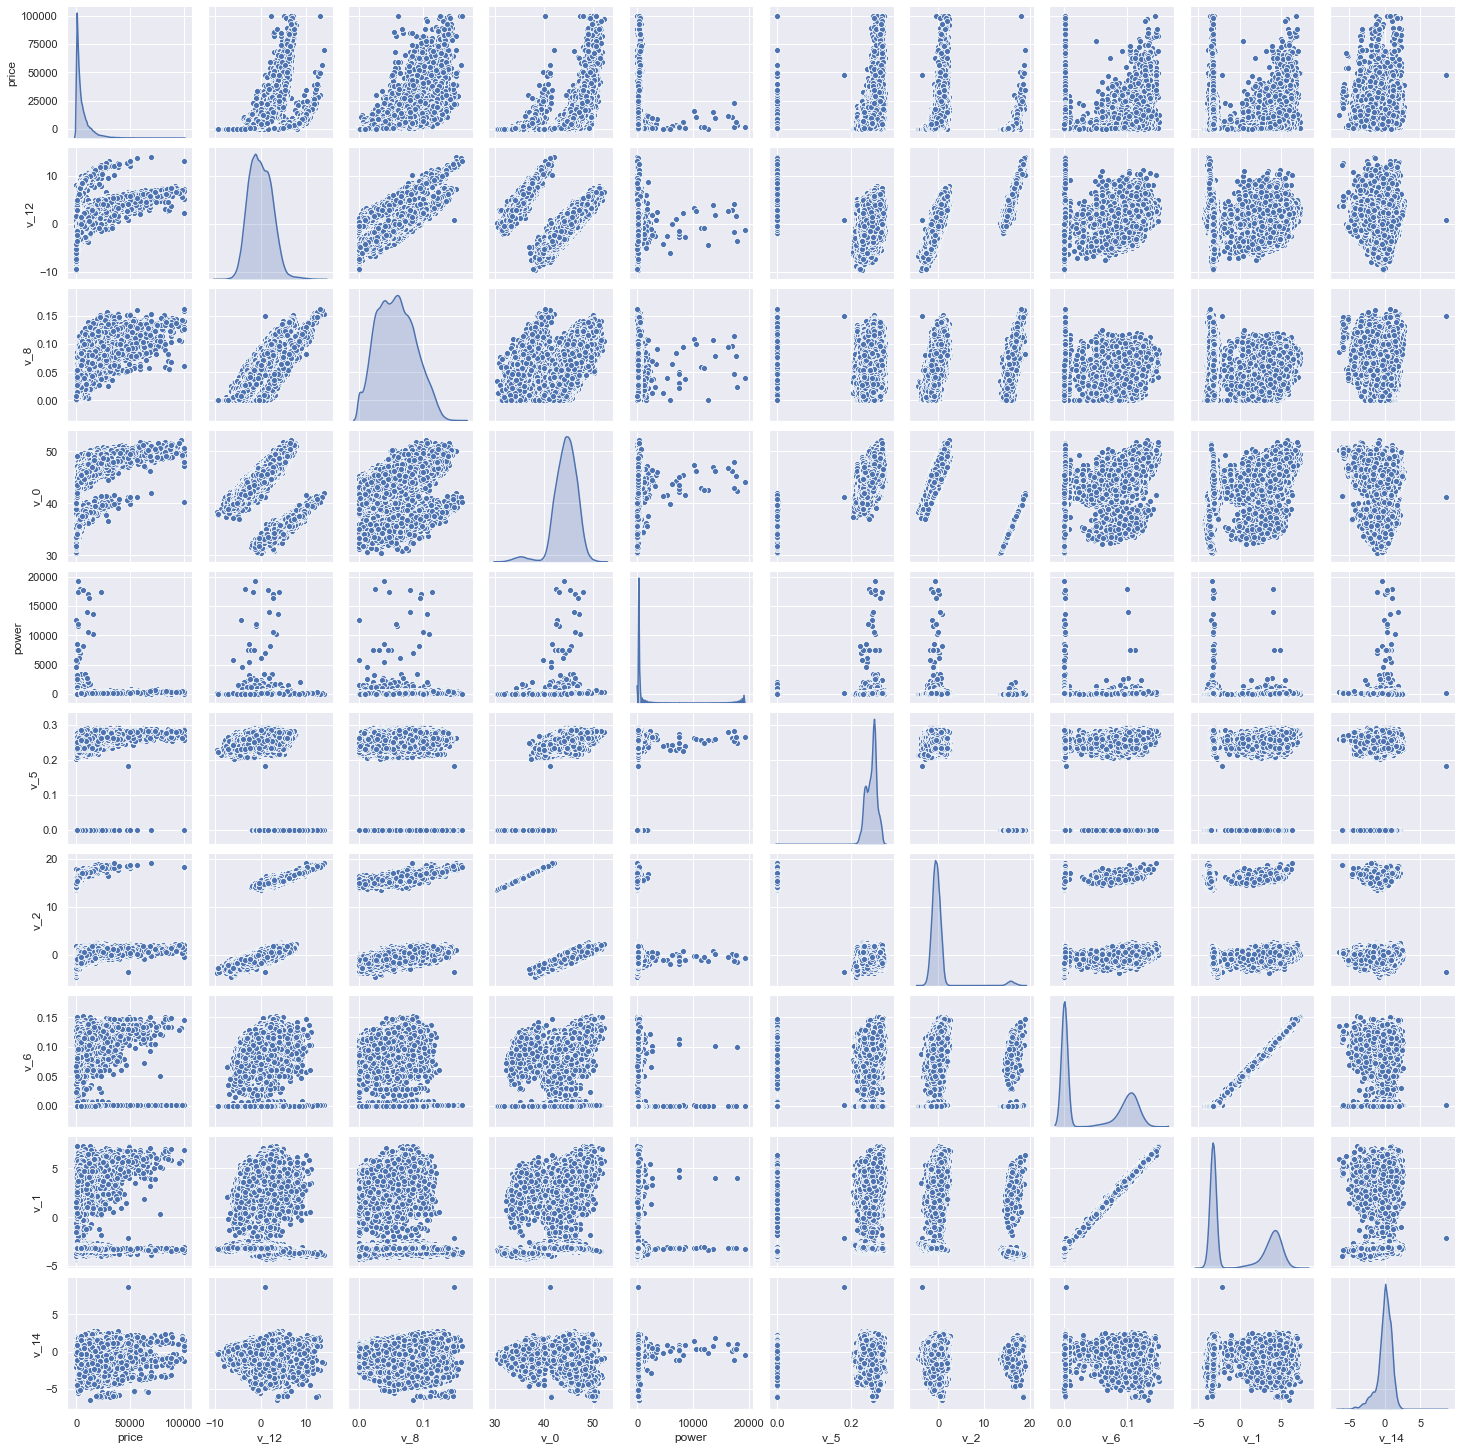

In [107]:
#数字特征相互关系之间的关系可视化
sns.set()
columns=['price','v_12','v_8','v_0','power','v_5','v_2','v_6','v_1','v_14']
sns.pairplot(Train_data[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()

In [108]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [109]:
Y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

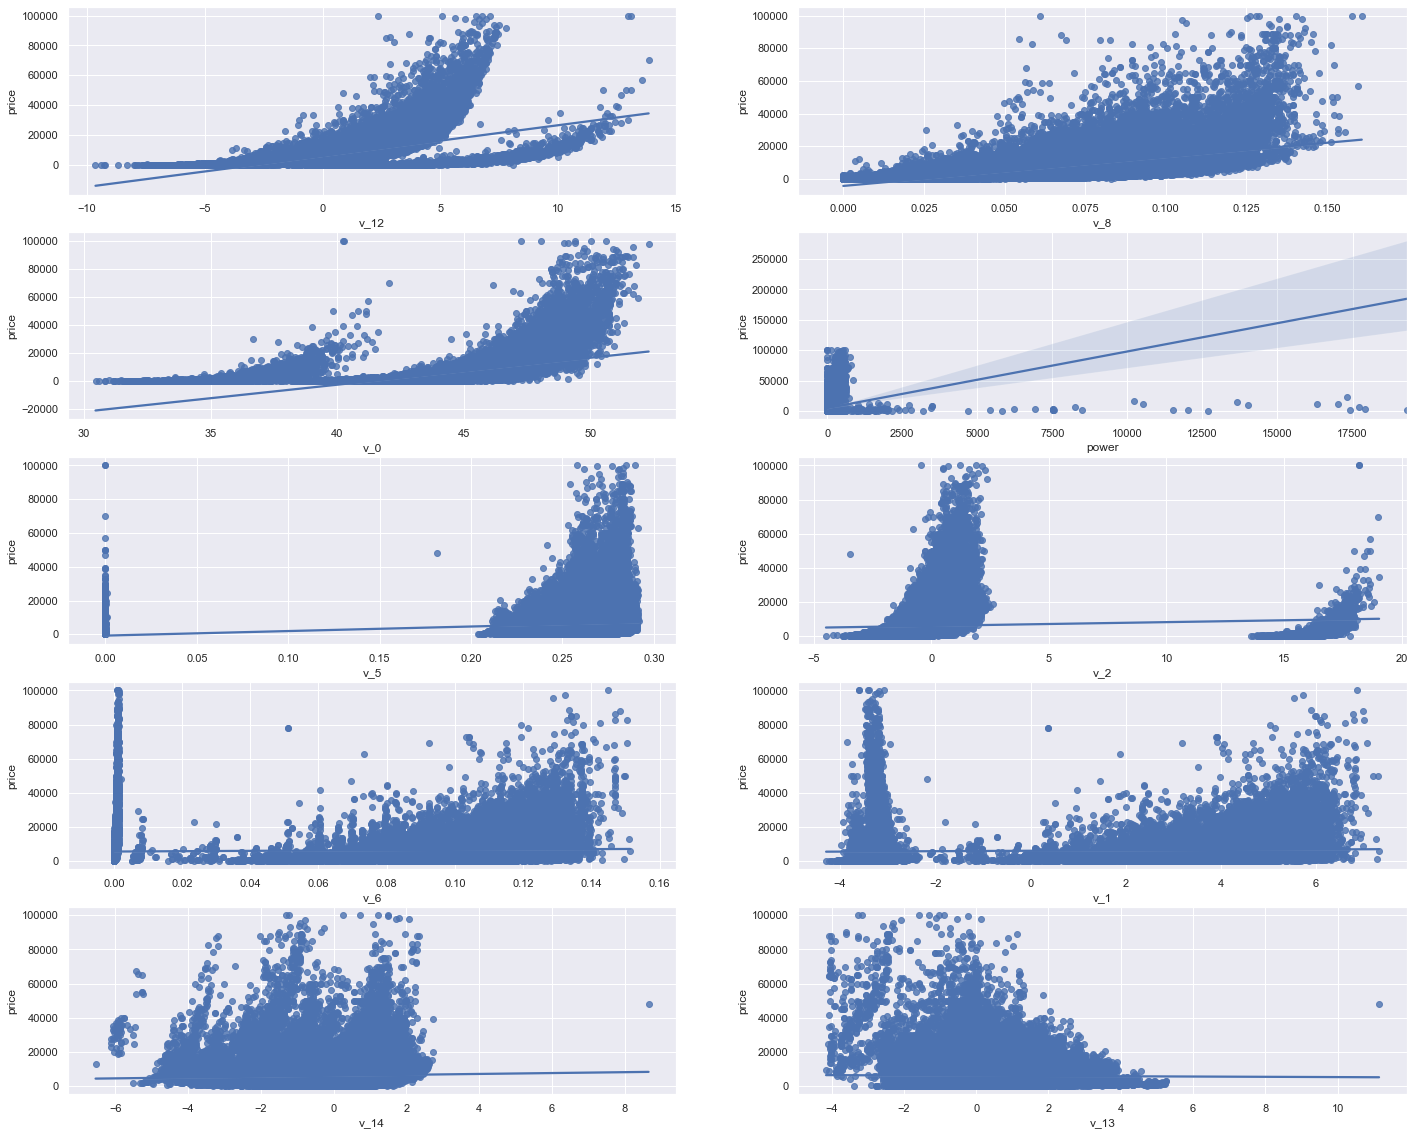

In [110]:
#多变量互相回归关系可视化
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(nrows=5,ncols=2,figsize=(24,20))
v_12_scatter_plot=pd.concat([Y_train,Train_data['v_12']],axis=1)
sns.regplot(x='v_12',y='price',data=v_12_scatter_plot,scatter=True,fit_reg=True,ax=ax1)
v_8_scatter_plot=pd.concat([Y_train,Train_data['v_8']],axis=1)
sns.regplot(x='v_8',y='price',data=v_8_scatter_plot,scatter=True,fit_reg=True,ax=ax2)
v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


In [ ]:
#类别特征分析
#(1)unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

In [112]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [ ]:
Train_data.columns

In [ ]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

利用panads生成数据分析报告

In [38]:
import pandas_profiling
pfr=pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

### 2.7、根据数据报告得出的结论

观察pandas生成的数据报告，猜测特征brand（品牌）、bodyType（车身类型）、fuelType（燃油类型）、gearbox（变速箱）、kilometer（汽车行驶公里）影响price比较大，利用可视化进行观察

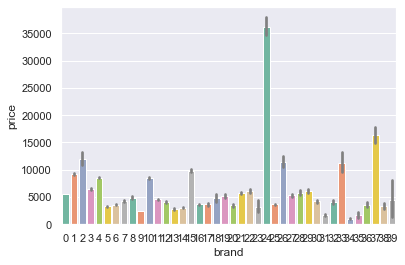

In [32]:
sns.barplot(x="brand", y="price", data=Train_data,palette="Set2",errcolor='grey')

有一个品牌二手车价格很高。

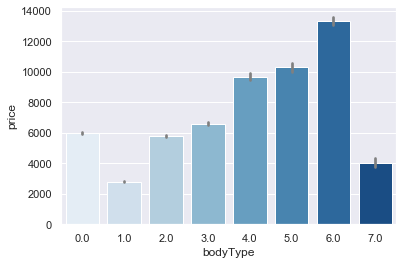

In [28]:
sns.barplot(x="bodyType", y="price", data=Train_data,palette="Blues",errcolor='grey')

车身类型为4.0、5.0、6.0的二手车价格更高。

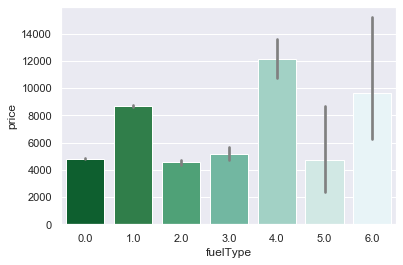

In [29]:
sns.barplot(x="fuelType", y="price", data=Train_data,palette="BuGn_r",errcolor='grey')

燃油类型为4.0、6.0的二手车价格更高。

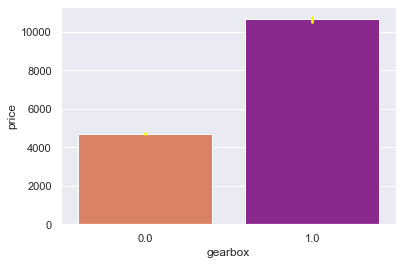

In [26]:
sns.barplot(x="gearbox", y="price", data=Train_data,palette="plasma_r",errcolor='yellow')

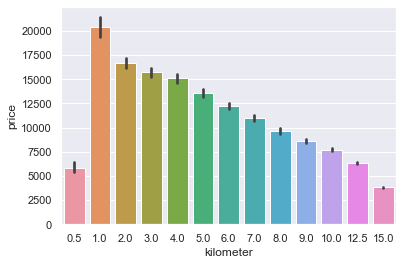

In [31]:
sns.barplot(x="kilometer", y="price", data=Train_data)